# Life Expectancy and GDP

This portfolio project is meant to test my skills using Python's matplotlib, seaborn, and pandas libraries
for data visualization and manipulation. The goal of this project is to view the data, determine the most
appropriate visualizations, and determine what relationships or correlations we can see within and among
the data.

In [18]:
## import our modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
import seaborn as sns
import numpy as np

In [24]:
## Open the CSV and store the data
df = pd.read_csv("all_data.csv")

## View some basic info
df.info()

## view some records
df.head()

life = "Life expectancy at birth (years)"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Exploring the Data

Now that we have the data stored in a `dataframe` called `df`, we can use some basic seaborn/matplotlib
methods to view the data. What might be good is viewing a `countplot` of the number of records from each
unique country to start.

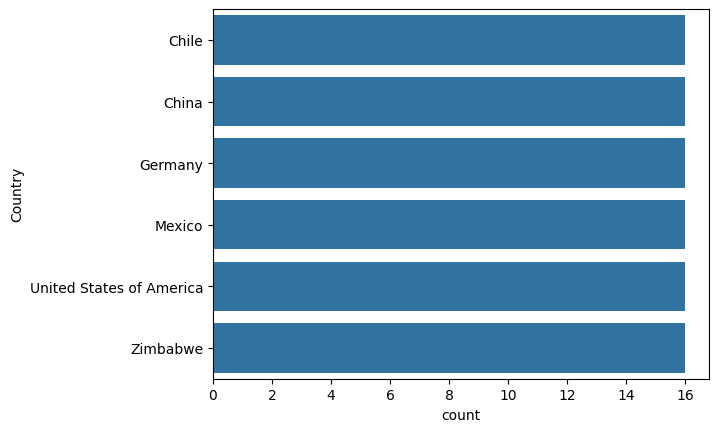

<Figure size 640x480 with 0 Axes>

In [3]:
## countplot of unique countries
sns.countplot(df["Country"])
plt.show()
plt.clf()

In the above, we can see that we have six unique countries each with 16 records, totaling our previously
shown record count of 96.

## First Visualization

The first meaningful visualization may be a line chart of year versus life-expectancy per country. Let's do
that by using subplots.

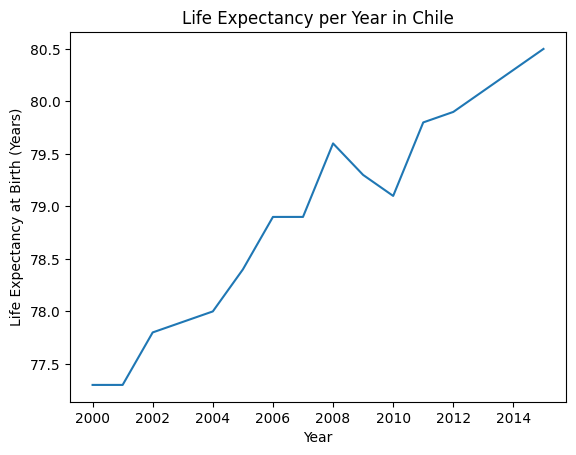

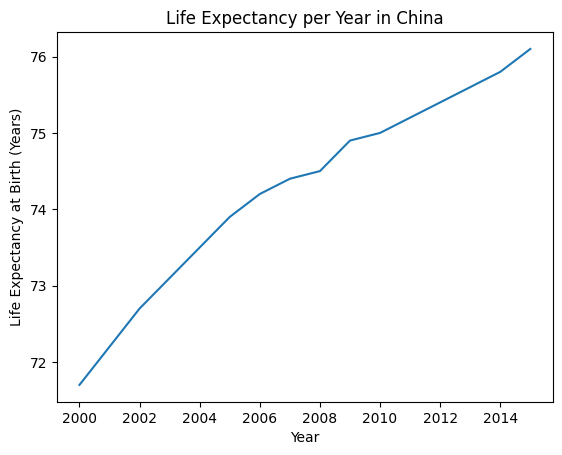

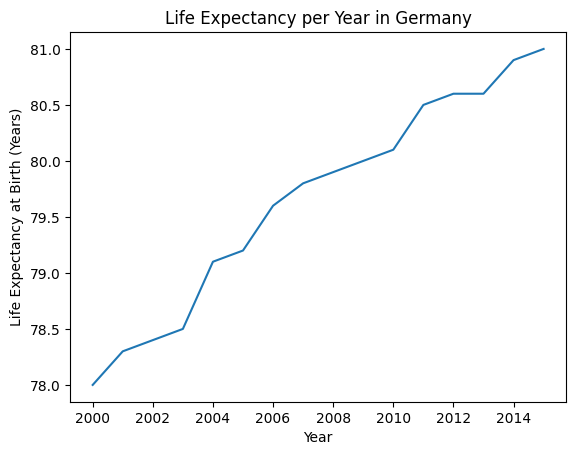

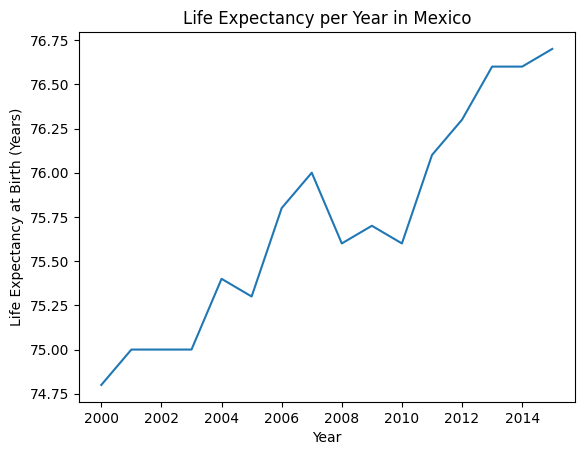

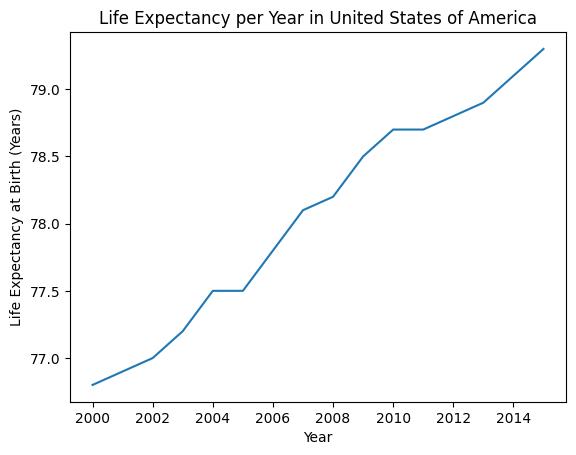

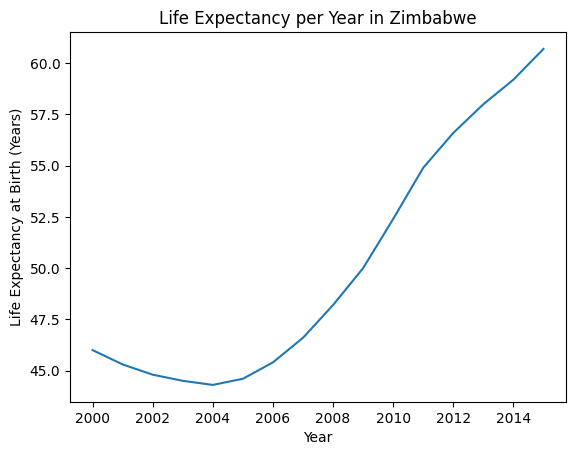

<Figure size 640x480 with 0 Axes>

In [4]:
## line plot of life expectancy per year by country
for country in df['Country'].unique():
    ## filter the dataframe
    sub_df = df[df['Country'] == country]

    ## plot the data
    sns.lineplot(x='Year', y='Life expectancy at birth (years)', 
                 data=sub_df)
    
    ## labels and show
    plt.title(f'Life Expectancy per Year in {country}')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy at Birth (Years)')
    plt.show()
    plt.clf()

Now let's view the same data, but on one single chart.

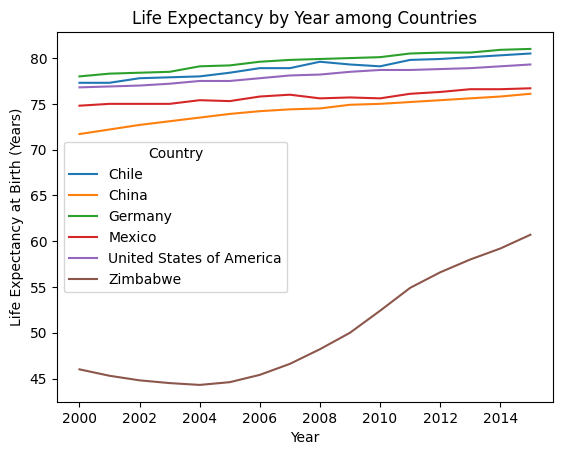

<Figure size 640x480 with 0 Axes>

In [5]:
## plot the data
sns.lineplot(x='Year', 
             y='Life expectancy at birth (years)', 
             hue='Country',
             data=df)

## labels and show
plt.title(f'Life Expectancy by Year among Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

## Multivariate Analysis

Now we want to visualize life expectancy in years compared to GDP.

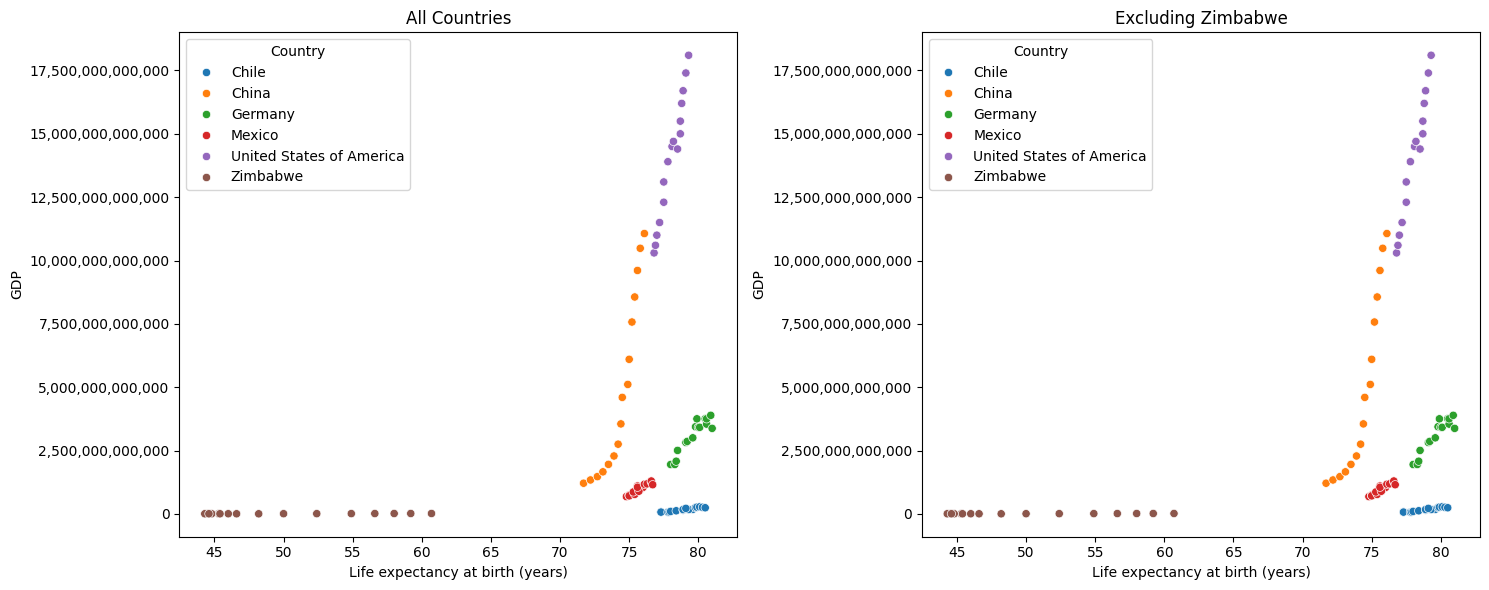

<Figure size 640x480 with 0 Axes>

In [7]:
# Create two subplots - one with and one without Zimbabwe
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Format y-axis numbers to improve readability
# Format y-axis with commas
def format_func(value, tick_number):
    return "{:,.0f}".format(value)



# Plot with all data
sns.scatterplot(data=df,
               y="GDP",
               x="Life expectancy at birth (years)",
               hue="Country",
               ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(format_func))
ax1.set_title("All Countries")

# Plot without Zimbabwe
sns.scatterplot(data=df,
               y="GDP",
               x="Life expectancy at birth (years)",
               hue="Country",
               ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
ax2.set_title("Excluding Zimbabwe")

plt.tight_layout()
plt.show()
plt.clf()

## Relationship of GDP and Life Expectancy

To determine a correlation between GDP and life expectancy, we can perform a correlation analysis.

In [23]:
## We need to determine if our data is normally distributed 
## before we can perform robust statistical analysis

def test_normality(data, variable_name="Variable"):
    """
    Performs multiple normality tests and prints results
    """
    # Shapiro-Wilk Test (best for n < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    
    # D'Agostino-Pearson Test
    dagostino_stat, dagostino_p = stats.normaltest(data)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data, 'norm')
    
    print(f"Normality Tests for {variable_name}")
    print("-" * 50)
    print(f"Shapiro-Wilk Test:")
    print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
    print(f"\nD'Agostino-Pearson Test:")
    print(f"Statistic: {dagostino_stat:.4f}, p-value: {dagostino_p:.4f}")
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")

test_normality(df['GDP'], "GDP")
print(f'\n')

gdp_log = np.log(df['GDP'])

test_normality(gdp_log, "GDP")

Normality Tests for GDP
--------------------------------------------------
Shapiro-Wilk Test:
Statistic: 0.7390, p-value: 0.0000

D'Agostino-Pearson Test:
Statistic: 23.7046, p-value: 0.0000

Kolmogorov-Smirnov Test:
Statistic: 1.0000, p-value: 0.0000


Normality Tests for GDP
--------------------------------------------------
Shapiro-Wilk Test:
Statistic: 0.8992, p-value: 0.0000

D'Agostino-Pearson Test:
Statistic: 10.2242, p-value: 0.0060

Kolmogorov-Smirnov Test:
Statistic: 1.0000, p-value: 0.0000


Even post transformation of the data, we still do not have a normally
distributed set of data. This means we can use a non-parametric test,
which is less robust, but will give us some understanding of the relationship 
between these two variables.

In [28]:
## setting up a bunch of non-parametric tests
def spearman_correlation(df):
    # Calculate Spearman correlation
    rho, p_value = stats.spearmanr(df['GDP'], df[life])
    
    print("Spearman Correlation Results:")
    print(f"Correlation coefficient (ρ): {rho:.4f}")
    print(f"P-value: {p_value:.4f}")

def kendall_correlation(df):
    # Calculate Kendall's tau
    tau, p_value = stats.kendalltau(df['GDP'], df[life])
    
    print("\nKendall's Tau Results:")
    print(f"Correlation coefficient (τ): {tau:.4f}")
    print(f"P-value: {p_value:.4f}")

def mann_whitney(df, group_column):
    # Split data into two groups
    group1 = df[df[group_column] == df[group_column].unique()[0]]['GDP']
    group2 = df[df[group_column] == df[group_column].unique()[1]]['GDP']
    
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

def kruskal_wallis(df, group_column):
    # Create list of groups
    groups = [group for name, group in df.groupby(group_column)['GDP']]
    
    # Perform Kruskal-Wallis H test
    statistic, p_value = stats.kruskal(*groups)
    
    print("\nKruskal-Wallis H Test Results:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

def theil_sen_regression(x, y):
    # Calculate Theil-Sen estimator
    slope, intercept, lo_slope, up_slope = stats.theilslopes(y, x)
    
    print("\nTheil-Sen Regression Results:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"95% confidence interval for slope: [{lo_slope:.4f}, {up_slope:.4f}]")

def comprehensive_nonparametric_analysis(df):
    # Run all relevant tests
    spearman_correlation(df)
    kendall_correlation(df)
    
    # If you have time series data, you might want to add:
    # Seasonal Mann-Kendall test for trend analysis
    from pymannkendall import seasonal_test
    
    def seasonal_mann_kendall(df):
        result = seasonal_test(df['GDP'])
        print("\nSeasonal Mann-Kendall Test Results:")
        print(f"Trend: {result.trend}")
        print(f"P-value: {result.p}")
        print(f"Tau: {result.Tau}")
    
    # Run all tests
    try:
        seasonal_mann_kendall(df)
        mann_whitney(df, life)
    except:
        print("Seasonal Mann-Kendall test requires seasonal data")

comprehensive_nonparametric_analysis(df)

Spearman Correlation Results:
Correlation coefficient (ρ): 0.4472
P-value: 0.0000

Kendall's Tau Results:
Correlation coefficient (τ): 0.3704
P-value: 0.0000

Seasonal Mann-Kendall Test Results:
Trend: no trend
P-value: 0.4532547047537365
Tau: 0.06547619047619048

Mann-Whitney U Test Results:
Statistic: 2.0000
P-value: 1.0000
